# Salary Estimation using Simple Linear Regression 

## The simple linear regression model is used to estimate the salary of a person based on year of experience

    1. The dataset contains two columns, year of experience and the salary
    2. The independent vairable (feature) for the model is year of experience
    3. The dependent variable (target/output) for the model is salary

In [74]:
# Import all the required model

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle as pk#Save the model in HDD
from sklearn.metrics import mean_squared_error
from math import sqrt

## Load the dataset

In [2]:
df=pd.read_csv("Salary_Data.csv")

In [3]:
df.head() # first 5 entries of the data to see what type of data is in dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Check the data information like column name, datatypes total entries in the dataset 

In [5]:
df.shape

(30, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Check the null values in the dataset 

In [7]:
df.isnull().sum()  # no null values are in dataset

YearsExperience    0
Salary             0
dtype: int64

## Check the linearity & correlation between dependent and independent variables

   1. The simple linear regression model is used only when there is linear replationship between dependent and independent           variables
   2. The simple linear regression model is sensetive to the outliers
   

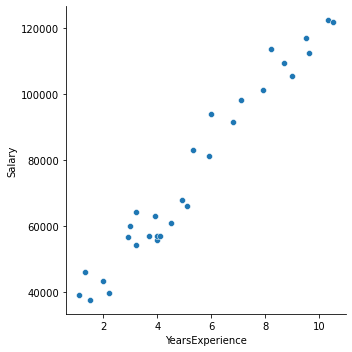

In [8]:
sns.relplot(x=df.YearsExperience,y=df.Salary,kind='scatter')

In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

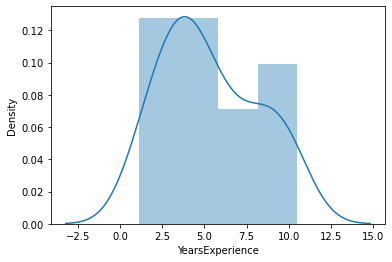

In [12]:
sns.distplot(df.YearsExperience)

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

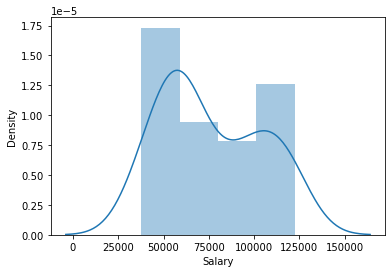

In [13]:
sns.distplot(df.Salary)

### Both dependent and independent variables shows the linear relationship with positive correlation and with no outliers

## Divide the data into dependent and independent variables

In [15]:
y=df["Salary"] # Dependent variable-- Salary
x=df["YearsExperience"] # Independent variable-- Year of experience

In [17]:
x.shape # check the size of Independent variable

(30,)

In [19]:
y.shape # check the size of dependent variable

(30,)

## Reshaping the independent variable

    The sklearn library required 2D values for processing, but the independent variable is 1D.
    Using reshape, we convert 1D independent variable into 2D

In [20]:
x_matrix=x.values.reshape(-1,1)

In [77]:
#x_matrix

In [22]:
x_matrix.shape # 2D independent variable

(30, 1)

## Divide the dataset into training and testing dataset 

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_matrix,y,test_size=0.25,random_state=101)

In [28]:
#x_train

In [29]:
#x_test

In [30]:
#y_test

In [31]:
#y_train

## Build a simple linear regression model

In [32]:
reg_model=LinearRegression()

## Model learning phase using training dataset

In [33]:
reg_model.fit(x_train,y_train)

LinearRegression()

## Model coefficient (slop/m) and y-intercept (c) 

In [37]:
reg_model.coef_  # slop (m)

array([9412.64272211])

In [38]:
reg_model.intercept_ # y-intercept (c)

26492.258137189623

# Prediction of dependent variable (y) 

## For training dataset

In [39]:
predy_train=reg_model.predict(x_train)

In [42]:
predy_train # prediction of 22 entries of training dataset

array([111206.04263615, 123442.47817489,  63201.56475341,  45317.5435814 ,
        38728.69367593,  82968.11446983, 100852.13564183,  64142.82902562,
        53788.9220313 ,  68849.15038667,  36846.16513151,  93322.02146415,
        47200.07212582,  56612.71484793,  65084.09329783,  61319.03620898,
        72614.20747551, 125325.00671931, 103675.92845846,  54730.18630351,
        76379.26456435,  64142.82902562])

## For testing dataset

In [43]:
predy_test=reg_model.predict(x_test)

In [44]:
predy_test # prediction of 8 entries of testing dataset

array([ 90498.22864751, 108382.24981952,  56612.71484793,  82026.85019762,
        40611.22222035, 116853.62826941, 115912.3639972 ,  74496.73601993])

## For all dataset

In [45]:
predy=reg_model.predict(x_matrix)   

In [48]:
predy # prediction of all 30 entries

array([ 36846.16513151,  38728.69367593,  40611.22222035,  45317.5435814 ,
        47200.07212582,  53788.9220313 ,  54730.18630351,  56612.71484793,
        56612.71484793,  61319.03620898,  63201.56475341,  64142.82902562,
        64142.82902562,  65084.09329783,  68849.15038667,  72614.20747551,
        74496.73601993,  76379.26456435,  82026.85019762,  82968.11446983,
        90498.22864751,  93322.02146415, 100852.13564183, 103675.92845846,
       108382.24981952, 111206.04263615, 115912.3639972 , 116853.62826941,
       123442.47817489, 125325.00671931])

Loss/cost function calculation

In [65]:
loss_fun_reg=sum((predy-y)**2)/2*len(y)
loss_fun_reg

14190103847.174303

# Model Accuracy

## Model training accuracy using .score method

In [49]:
train_acc=reg_model.score(x_train,y_train)
train_acc

0.9446929404015515

## Model testing accuracy using .score method

In [50]:
test_acc=reg_model.score(x_test,y_test)
test_acc

0.9820915410004406

## Model training accuracy using R square method

In [64]:
r_squared_train=r2_score(y_train, predy_train)
r_squared_train

0.9446929404015515

## Model testing accuracy using R square method

In [66]:
r_squared_test=r2_score(y_test, predy_test)
r_squared_test

0.9820915410004406

## MSE & RMSE values for training dataset

In [55]:
mse_train=mean_squared_error(y_train,predy_train)
mse_train

38150854.135948285

In [56]:
rmse_train=sqrt(mse_train)
rmse_train

6176.637769527066

## MSE & RMSE values for testing dataset

In [59]:
mse_test=mean_squared_error(y_test,predy_test)
mse_test

13336016.519261394

In [60]:
rmse_test=sqrt(mse_test)
rmse_test

3651.8511085833434

## Evaluation

### Training Accuracy
     1. Using .score methode: 94%
     2. Using R square methode: 94%
     
### Testing Accuracy
     1. Using .score methode: 98%
     2. Using R square methode: 98%     

### Training MSE & RMSE
     1. MSE:  38150854.14
     2. RMSE: 6176.64
    
### Testing MSE & RMSE
     1. MSE:  13336016.52
     2. RMSE: 3651.85

Model is overfit

# Plotting

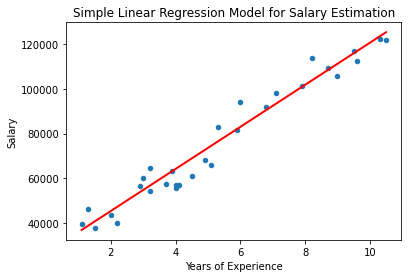

In [72]:
df.plot(kind="scatter",x="YearsExperience",y="Salary",title="Simple Linear Regression Model for Salary Estimation",xlabel="Years of Experience",ylabel="Salary")
plt.plot(x,predy,c="red",linewidth=2)

## Saving the model in local drive

In [75]:
filename="slr_salary_model.pk"
pk.dump(reg_model,open(filename,"wb"))